In [1]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('januber.csv', encoding='utf-8')

In [3]:
df = pd.DataFrame({"Tweets":df['text']})

In [4]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

In [5]:
df['Tweets'] = df['Tweets'].apply(cleanTxt)


In [6]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,_Support\n_NYC\n_India\n \n\nMy account has go...,0.533333,0.016667
1,"Let it corporate or personal life, in need of ...",0.310000,0.012500
2,Someone in India really hacked my uber account...,0.200000,0.200000
3,"_luv Hey Rahul, kindly share your registered c...",0.900000,0.600000
4,"No crea Jorge, con la devaluación del peso no ...",0.000000,0.000000
...,...,...,...
14665,"Hey, sorry to hear that you weren't able to ap...",0.675000,0.033333
14666,"Hey Pritam, sorry to hear about the trouble. W...",0.650000,-0.025000
14667,"_Support I Am Facing This Weird Issue,When I T...",0.583333,-0.250000
14668,"Hey Somnath, as per the MHA guidelines rides a...",0.466667,0.366667


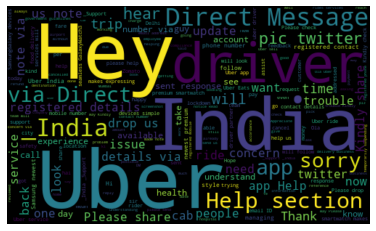

In [7]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,_Support\n_NYC\n_India\n \n\nMy account has go...,0.533333,0.016667,Positive
1,"Let it corporate or personal life, in need of ...",0.310000,0.012500,Positive
2,Someone in India really hacked my uber account...,0.200000,0.200000,Positive
3,"_luv Hey Rahul, kindly share your registered c...",0.900000,0.600000,Positive
4,"No crea Jorge, con la devaluación del peso no ...",0.000000,0.000000,Neutral
...,...,...,...,...
14665,"Hey, sorry to hear that you weren't able to ap...",0.675000,0.033333,Positive
14666,"Hey Pritam, sorry to hear about the trouble. W...",0.650000,-0.025000,Negative
14667,"_Support I Am Facing This Weird Issue,When I T...",0.583333,-0.250000,Negative
14668,"Hey Somnath, as per the MHA guidelines rides a...",0.466667,0.366667,Positive


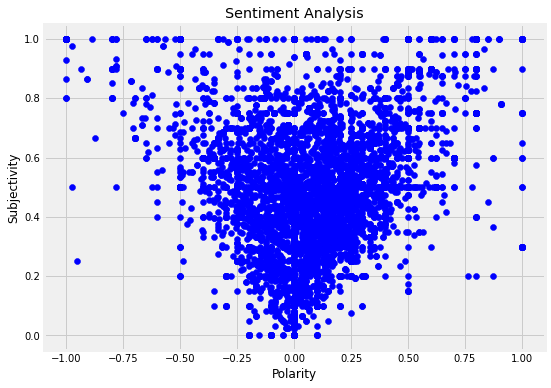

In [13]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [14]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

44.1

In [15]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets
0
round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

17.0

In [16]:
# Show the value counts
df['Analysis'].value_counts()

Positive    6472
Neutral     5711
Negative    2487
Name: Analysis, dtype: int64

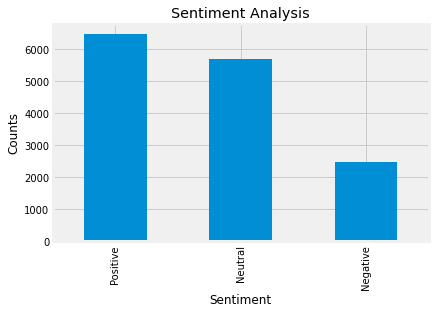

In [17]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [14]:
import pandas as pd
import numpy as np
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
!pip install ekphrasis
!pip install tweet-preprocessor


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
import preprocessor as p
df.tweets['hashtag'] = tweets['tweet_text'].apply(lambda x: re.findall(r"#(\w+)", x))
for i,v in enumerate(tweets['text']):
    tweets.loc[v,text] = p.clean(i)
def preprocess_data(data):
    data = data.astype(str).str.replace('\d+', '')
    lower_text = data.str.lower()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    w_tokenizer =  TweetTokenizer()

def lemmatize_text(text):
    return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', (word))
        if new_word != '':
            new_words.append(new_word)
            return new_words
words = lower_text.apply(lemmatize_text)
words = words.apply(remove_punctuation)
return pd.DataFrame(words)
pre_tweets = preprocess_data(tweets['text'])
tweets['text'] = pre_tweets
stop_words = set(stopwords.words('english'))
tweets['text'] = tweets['text'].apply(lambda x: [item for item in \
                                    x if item not in stop_words])
from ekphrasis.classes.segmenter import Segmenter
# segmenter using the word statistics from Twitter
seg_tw = Segmenter(corpus="twitter")
a = []
for i in range(len(tweets)):
    if tweets['hashtag'][i] != a:
        listToStr1 = ' '.join([str(elem) for elem in tweets['hashtag'][i]])
        tweets.loc[i,'Segmented#'] = seg_tw.segment(listToStr1)
#Frequency of words
fdist = FreqDist(tweets['Segmented#'])


AttributeError: 'DataFrame' object has no attribute 'tweets'

SyntaxError: invalid character in identifier (<ipython-input-18-1ce025392b54>, line 1)

In [23]:
ayes = df[df['Analysis'].str.match('Positive')]
ayes.to_csv (r'C:\Users\user1\jan_uber_positive.csv', index=True, header=False)

In [24]:
nays = df[df['Analysis'].str.match('Negative')]
nays.to_csv (r'C:\Users\user1\jan_uber_negative.csv', index=True, header=False)

In [19]:
nays = df[df['Analysis'].str.match('Neutral')]
nays.to_csv (r'C:\Users\user1\jan_uber_neutral.csv', index=True, header=False)